<a href="https://colab.research.google.com/github/Brunapupo/cin7915-09342-data-science/blob/master/projeto_treinamento_detecaoo_de_raios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise do tema escolhido**

**O conjunto de dados simula a detecção de raios gama de alta energia por um telescópio Cherenkov. Através da radiação Cherenkov emitida pelas partículas carregadas nas cascadas eletromagnéticas, é possível reconstruir os parâmetros da cascata. Os dados contêm informações sobre os pulsos de fótons registrados e padrões de imagens, que permitem discriminar entre raios gama e ruído de fundo. A análise inclui parâmetros de elongação, assimetria e distribuição de energia, obtidos por meio de técnicas de componentes principais. O conjunto de dados foi gerado por um programa de Monte Carlo chamado Corsika e abrange eventos com energia a partir de 50 GeV.**

# **Informações utilizadas no Projeto**

**No projeto, foram aplicadas técnicas aprendidas ao longo do curso de Data Science, como a análise de normalidade da distribuição, a avaliação da variância e a análise de regressão. Além disso, foram utilizadas outras técnicas adquiridas por meio de estudos contínuos em Data Science. A análise realizada permitiu distinguir entre os raios gama e o ruído de fundo, utilizando técnicas de componentes principais. Esse trabalho representa a aplicação prática dos conhecimentos adquiridos e o compromisso contínuo de aprimorar as habilidades na área de Data Science.**

# **Dataset:**

Dua, D. e Graff, C. (2019). Repositório de Aprendizado de Máquina da UCI https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope. Irvine, CA: Universidade da Califórnia, Escola de Informação e Ciência da Computação.

Doado por:
P. Savicky
Instituto de Ciência da Computação, AS da CR
República Tcheca
savicky '@' cs.cas.c

# **Montando os dados**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import scipy.stats as st
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [3]:
colunas = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
dados = pd.read_csv("/content/sample_data/magic04.data", names=colunas)
dados.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


# **Converte as colunas para valores binários**

In [4]:
dados["class"] = (dados["class"] == "g").astype(int)


In [5]:
dados.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


# **⏺ 1 - Existe evidência estatística de que a variável 'fSize' segue uma distribuição normal ?**  



In [7]:
pivot_table = pd.pivot_table(dados, values='fSize', index='class', aggfunc='mean')
print(pivot_table)



          fSize
class          
0      2.900609
1      2.784021


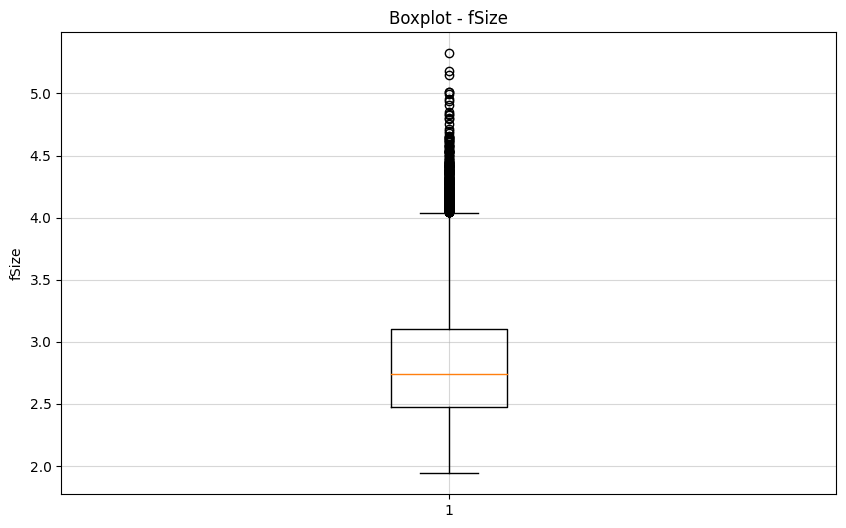

In [75]:
plt.figure(figsize=(10, 6))
plt.boxplot(dados['fSize'])
plt.title('Boxplot - fSize')
plt.ylabel('fSize')
plt.grid(True, linestyle='-', alpha=0.5)
plt.show()



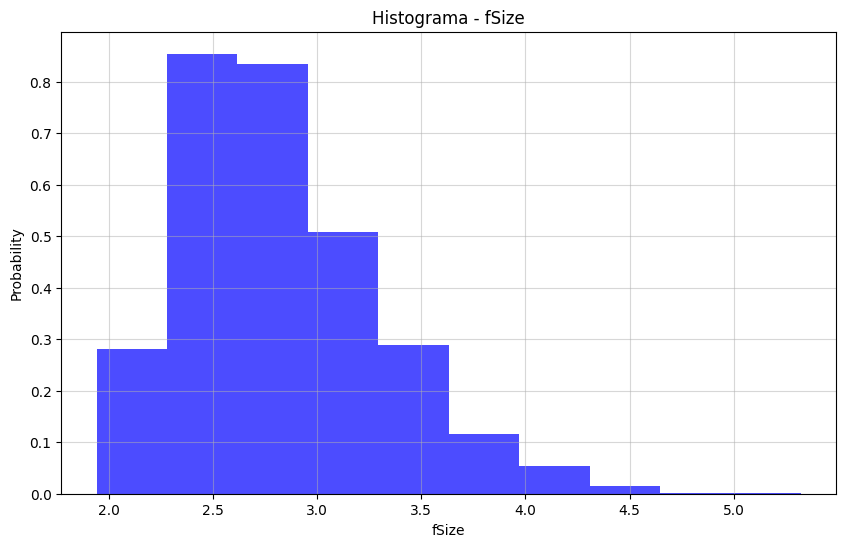

In [76]:
plt.figure(figsize=(10, 6))
plt.hist(dados['fSize'], color='blue', alpha=0.7, density=True)
plt.title('Histograma - fSize')
plt.xlabel('fSize')
plt.ylabel('Probability')
plt.grid(True, linestyle='-', alpha=0.5)
plt.show()

In [77]:
import warnings

# Ignorar a advertência relacionada ao módulo scipy.stats, que aparece quando os dados são muito grandes
warnings.filterwarnings("ignore", category=UserWarning, module="scipy.stats")

# teste de shapiro
resultado = st.shapiro(dados['fSize'])
print('Estatística de teste:', resultado.statistic)
print('Valor-p:', resultado.pvalue)

Estatística de teste: 0.9517554640769958
Valor-p: 0.0


# **1 - Resposta: ✅**

**H0: Os dados são normalmente distribuídos Aceitar H0 é p_valor > 0,05**

**pvalue = 0.9517554640769958 é maior que 0.05, a hipótese nula é aceita**




# **⏺ 2 -  A variável 'fLength' segue uma distribuição normal?**

In [78]:
pivot_table = pd.pivot_table(dados, values='fLength', index='class', aggfunc='mean')
print(pivot_table)



         fLength
class           
0      70.943504
1      43.654539


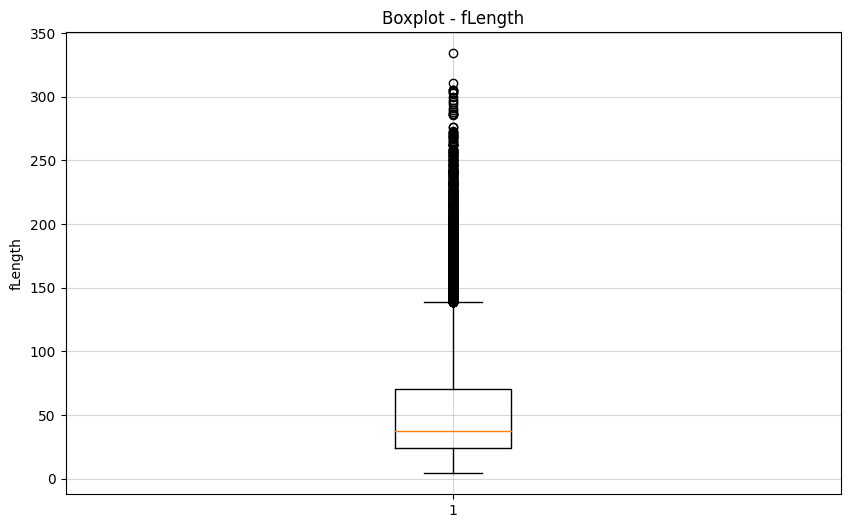

In [79]:
plt.figure(figsize=(10, 6))
plt.boxplot(dados['fLength'])
plt.title('Boxplot - fLength')
plt.ylabel('fLength')
plt.grid(True, linestyle='-', alpha=0.5)
plt.show()


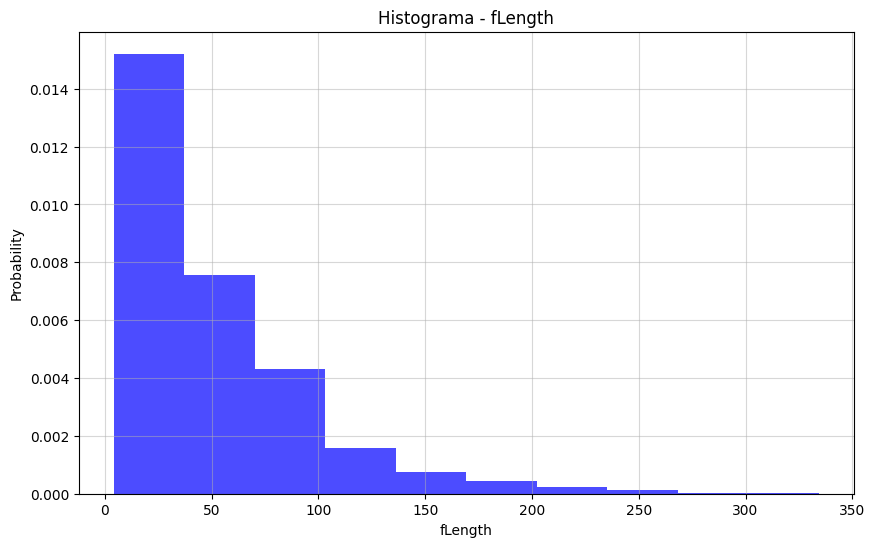

In [80]:
plt.figure(figsize=(10, 6))
plt.hist(dados['fLength'], color='blue', alpha=0.7, density=True)
plt.title('Histograma - fLength')
plt.xlabel('fLength')
plt.ylabel('Probability')
plt.grid(True, linestyle='-', alpha=0.5)
plt.show()
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="scipy.stats")

In [81]:
import warnings

# Ignorar a advertência relacionada ao módulo scipy.stats, que aparece quando os dados são muito grandes
warnings.filterwarnings("ignore", category=UserWarning, module="scipy.stats")

# teste de shapiro
resultado = st.shapiro(dados['fLength'])
print('Estatística de teste:', resultado.statistic)
print('Valor-p:', resultado.pvalue)

Estatística de teste: 0.789318323135376
Valor-p: 0.0


# **2 - Resposta: ✅**

**H0: Os dados são normalmente distribuídos Aceitar H0 é p_valor > 0,05**

**pvalue= 0.789318323135376 é maior que 0.05, a hipótese nula é aceita**


# **⏺ 3 - A variável 'fWidth' segue uma distribuição normal?**

In [82]:
pivot_table = pd.pivot_table(dados, values='fWidth', index='class', aggfunc='mean')
print(pivot_table)

          fWidth
class           
0      28.797373
1      18.592698


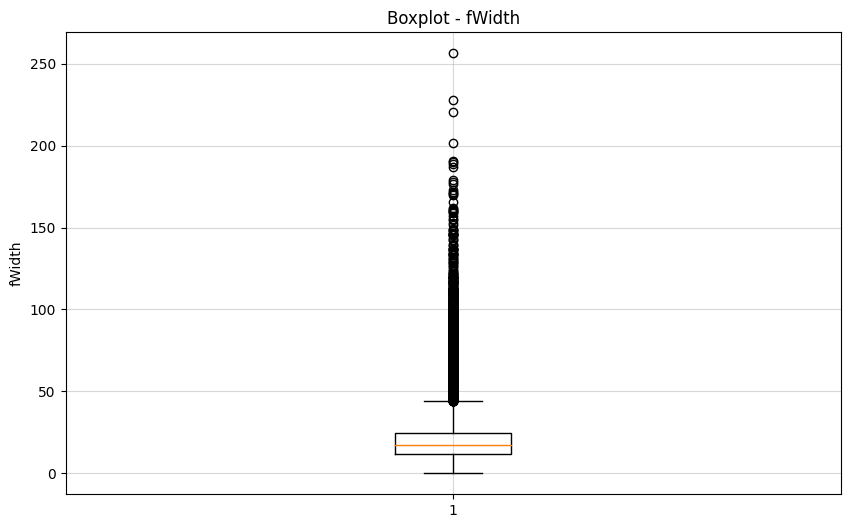

In [83]:
plt.figure(figsize=(10, 6))
plt.boxplot(dados['fWidth'])
plt.title('Boxplot - fWidth')
plt.ylabel('fWidth')
plt.grid(True, linestyle='-', alpha=0.5)
plt.show()

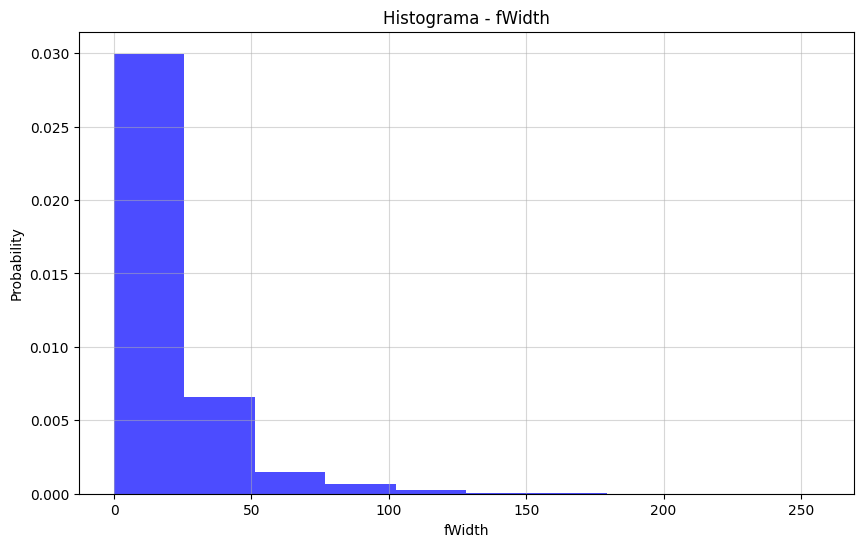

In [84]:
plt.figure(figsize=(10, 6))
plt.hist(dados['fWidth'], color='blue', alpha=0.7, density=True)
plt.title('Histograma - fWidth')
plt.xlabel('fWidth')
plt.ylabel('Probability')
plt.grid(True, linestyle='-', alpha=0.5)
plt.show()

In [85]:
import warnings

# Ignorar a advertência relacionada ao módulo scipy.stats, que aparece quando os dados são muito grandes
warnings.filterwarnings("ignore", category=UserWarning, module="scipy.stats")

# teste de shapiro
resultado = st.shapiro(dados['fWidth'])

print('Estatística de teste:', resultado.statistic)
print('Valor-p:', resultado.pvalue)

Estatística de teste: 0.6756542921066284
Valor-p: 0.0


# **3 - Resposta: ✅**
 **H0: Os dados são normalmente distribuídos Aceitar H0 é p_valor > 0,05**


**pvalue= 0.6756542921066284 é maior que 0.05, a hipótese nula é aceita**

# **⏺ 4 - Podemos afirmar que existe diferença significativa na variância da variável 'fWidth' entre os grupos definidos pelos critérios de 'fLength' e 'fSize'?"**

In [86]:
grupo_A = dados[dados['fLength'] <= 50]['fWidth']
grupo_B = dados[dados['fLength'] > 50]['fWidth']

grupo_X = dados[dados['fSize'] <= 3]['fWidth']
grupo_Y = dados[dados['fSize'] > 3]['fWidth']

In [87]:
# Aplicar o teste de Two-Way ANOVA
estatisticas, p_valor = stats.f_oneway(grupo_A, grupo_B, grupo_X, grupo_Y)

# Exibir os resultados
print('Estatísticas:', estatisticas)
print('Valor-p:', p_valor)

Estatísticas: 6231.894752238696
Valor-p: 0.0


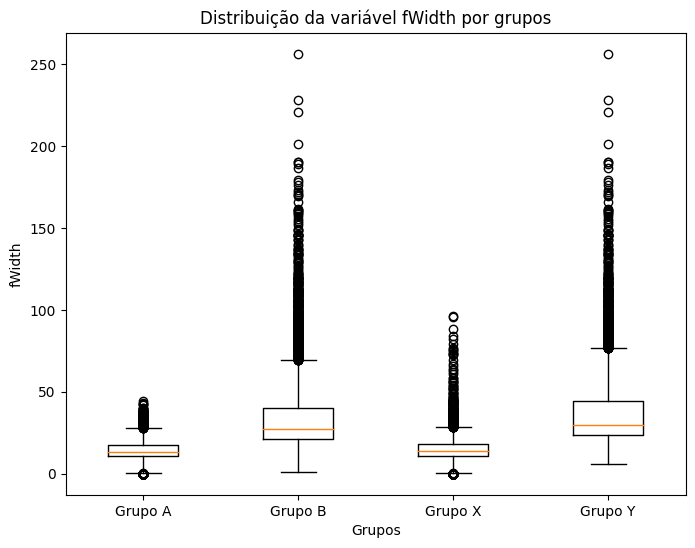

In [88]:
# Plotar o boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([grupo_A, grupo_B, grupo_X, grupo_Y], labels=['Grupo A', 'Grupo B', 'Grupo X', 'Grupo Y'])
plt.title('Distribuição da variável fWidth por grupos')
plt.xlabel('Grupos')
plt.ylabel('fWidth')
plt.show()


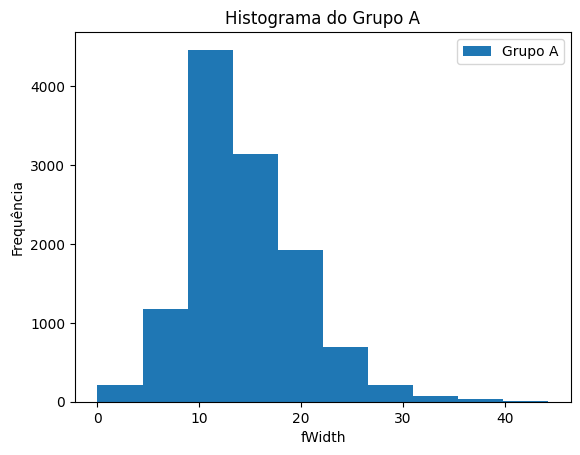

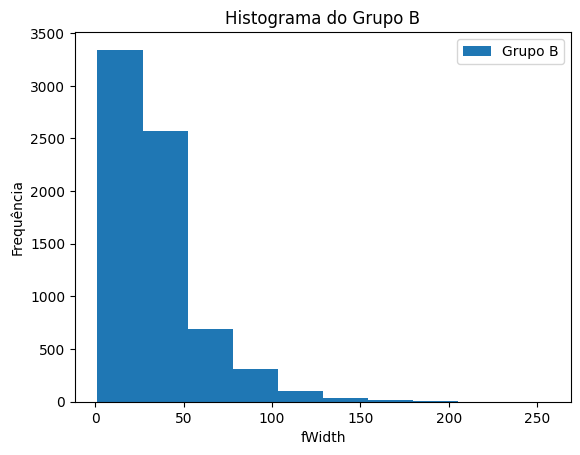

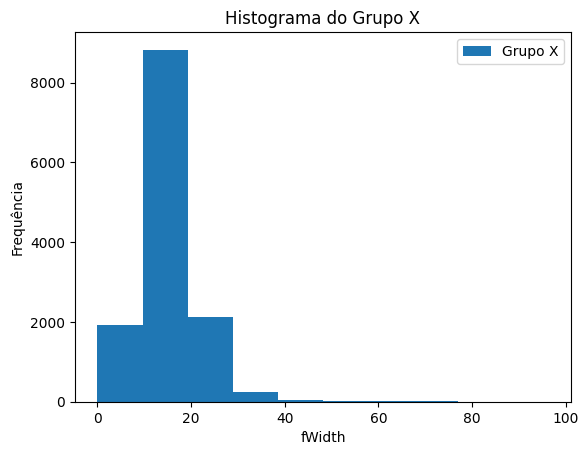

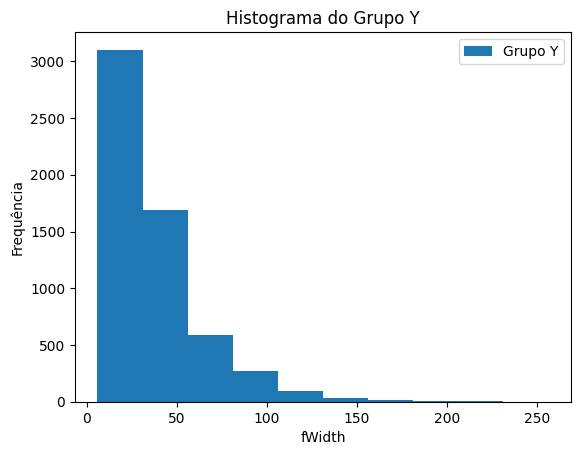

In [22]:

# Definir os grupos com base nos fatores
grupo_A = dados[dados['fLength'] <= 50]['fWidth']
grupo_B = dados[dados['fLength'] > 50]['fWidth']
grupo_X = dados[dados['fSize'] <= 3]['fWidth']
grupo_Y = dados[dados['fSize'] > 3]['fWidth']

# Plotar histograma para o grupo A
plt.hist(grupo_A, bins=10, label='Grupo A')
plt.xlabel('fWidth')
plt.ylabel('Frequência')
plt.title('Histograma do Grupo A')
plt.legend()
plt.show()

# Plotar histograma para o grupo B
plt.hist(grupo_B, bins=10, label='Grupo B')
plt.xlabel('fWidth')
plt.ylabel('Frequência')
plt.title('Histograma do Grupo B')
plt.legend()
plt.show()

# Plotar histograma para o grupo X
plt.hist(grupo_X, bins=10, label='Grupo X')
plt.xlabel('fWidth')
plt.ylabel('Frequência')
plt.title('Histograma do Grupo X')
plt.legend()
plt.show()

# Plotar histograma para o grupo Y
plt.hist(grupo_Y, bins=10, label='Grupo Y')
plt.xlabel('fWidth')
plt.ylabel('Frequência')
plt.title('Histograma do Grupo Y')
plt.legend()
plt.show()


# **4 - Resposta: ✅**

**Dado o resultado da ANOVA: 6231.894752238696
Valor-p: 0.0**

-> **value = variância das médias do grupo (Mean Square Between) / média das variâncias dentro do grupo (Mean Squared Error), ou seja, Quanto maior, maior a diferença.**

-> **P value = No caso apresentado, o valor-p é igual a 0.0, o que indica fortemente que há diferenças estatisticamente significativas entre as médias dos grupos em análise. Portanto, rejeitamos a hipótese nula a um nível de significância de 0,05.**

# **⏺ 5 - Há diferenças significativas nas médias da variável específica 'fConc1' entre os grupos ou categorias definidos de acordo com o critério utilizado, considerando a análise de variância?"**




In [24]:
grupo_A = dados[dados['fConc'] <= 0.5]['fConc1']
grupo_B = dados[dados['fConc'] > 0.5]['fConc1']

grupo_X = dados[dados['fConc'] <= 0.3]['fConc1']
grupo_Y = dados[dados['fConc'] > 0.3]['fConc1']

# Aplicar o teste de Two-Way ANOVA
estatisticas, p_valor = stats.f_oneway(grupo_A, grupo_B, grupo_X, grupo_Y)

# Exibir os resultados
print('Estatísticas:', estatisticas)
print('Valor-p:', p_valor)

Estatísticas: 18498.780939422846
Valor-p: 0.0


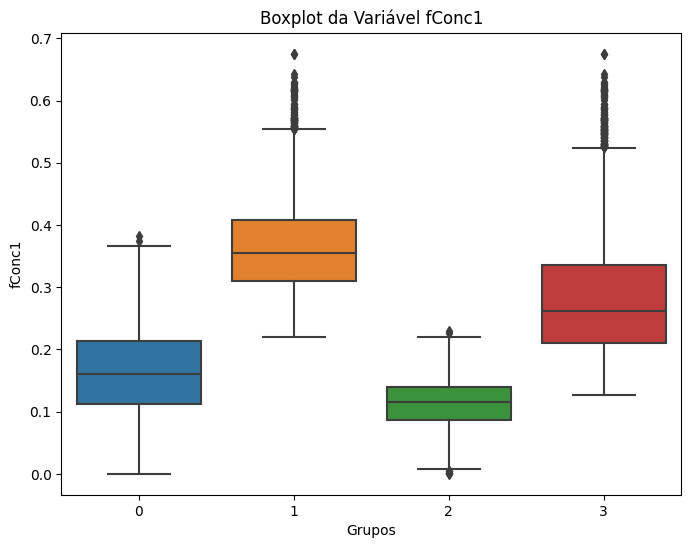

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=[grupo_A, grupo_B, grupo_X, grupo_Y])
plt.title('Boxplot da Variável fConc1')
plt.xlabel('Grupos')
plt.ylabel('fConc1')
plt.show()


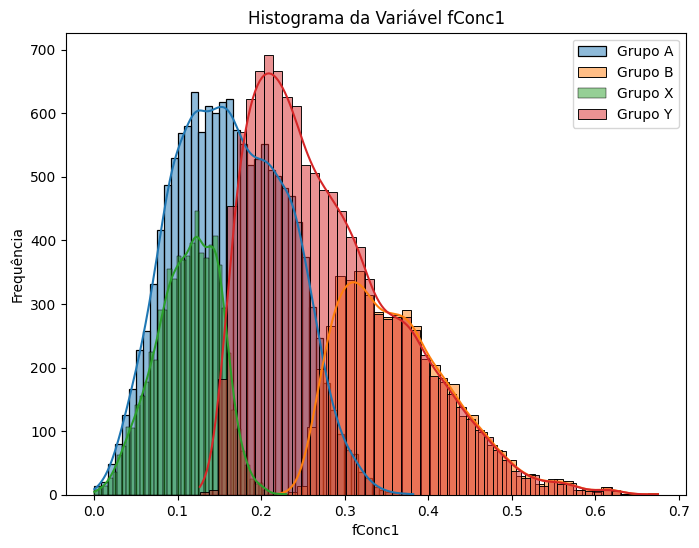

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(grupo_A, label='Grupo A', kde=True)
sns.histplot(grupo_B, label='Grupo B', kde=True)
sns.histplot(grupo_X, label='Grupo X', kde=True)
sns.histplot(grupo_Y, label='Grupo Y', kde=True)
plt.title('Histograma da Variável fConc1')
plt.xlabel('fConc1')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# **5 - Resposta: ✅**

**Dado o resultado da ANOVA: 18498.780939422846 Valor-p: 0.0**

**-> value = variância das médias do grupo (Mean Square Between) / média das variâncias dentro do grupo (Mean Squared Error), ou seja, Quanto maior, maior a diferença.**

-> P **value = No caso apresentado, o valor-p é igual a 0.0, o que indica fortemente que há diferenças estatisticamente significativas entre as médias dos grupos em análise. Portanto, rejeitamos a hipótese nula a um nível de significância de 0,05.**

# **⏺ 6 - Qual é o valor do erro quadrático médio (Mean Squared Error) obtido pelo modelo de análise de regressão para os dados de teste?**

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = dados[dados.columns[:-1]]
y = dados['class']

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.15081834794793622


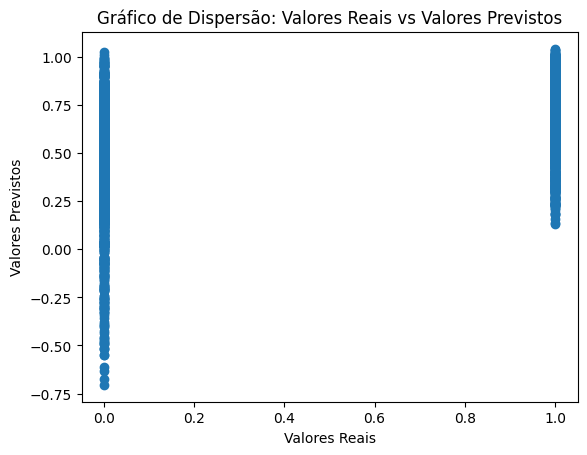

In [32]:
# Gráfico de dispersão
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Gráfico de Dispersão: Valores Reais vs Valores Previstos')
plt.show()

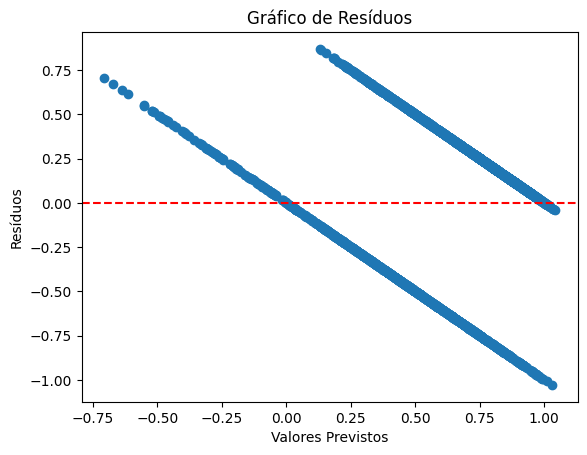

In [33]:
# Gráfico de resíduos
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.show()

# **6 - Resposta: ✅**

**O valor do erro quadrático médio (Mean Squared Error) obtido pelo modelo de regressão para os dados de teste é de aproximadamente 0.1508.**

**Isso indica que, em média, o modelo tem uma diferença de 0.1508 unidades ao prever o valor real para a variável dependente. Quanto menor o valor do erro quadrático médio, melhor é o desempenho do modelo em ajustar-se aos dados de teste.**

# **⏺ 7 -  Qual combinação de variáveis independentes utilizada na regressão linear apresentou o menor erro médio quadrático (Mean Squared Error)?**

# **Combinação 1**

In [37]:
X1 = dados[['fLength', 'fWidth']]
y1 = dados['class']

# Dividir o dataset em treino e teste
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear para a combinação 1
model1 = LinearRegression()
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)
mse1 = mean_squared_error(y1_test, y1_pred)
print('Combinação 1 - Mean Squared Error:', mse1)

Combinação 1 - Mean Squared Error: 0.20469346100018415


# **Combinação 2**

In [42]:
# Exemplo de combinação 2: 'fSize' e 'fConc' como variáveis independentes
X2 = dados[['fSize', 'fConc']]
y2 = dados['class']

# Dividir o dataset em treino e teste
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear para a combinação 2
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)
mse2 = mean_squared_error(y2_test, y2_pred)
print('Combinação 2 - Mean Squared Error:', mse2)



Combinação 2 - Mean Squared Error: 0.22046833691718432


# **Combinação 3**

In [43]:
# Exemplo de combinação 3: 'fLength', 'fWidth' e 'fSize' como variáveis independentes
X3 = dados[['fLength', 'fWidth', 'fSize']]
y3 = dados['class']

# Dividir o dataset em treino e teste
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear para a combinação 3
model3 = LinearRegression()
model3.fit(X3_train, y3_train)
y3_pred = model3.predict(X3_test)
mse3 = mean_squared_error(y3_test, y3_pred)
print('Combinação 3 - Mean Squared Error:', mse3)

Combinação 3 - Mean Squared Error: 0.19844771108541748


# **Gráfico de dispersão da combinação 1**

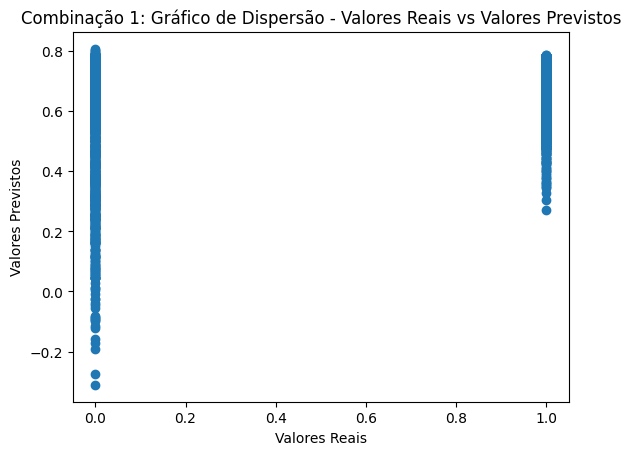

In [40]:

plt.scatter(y1_test, y1_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Combinação 1: Gráfico de Dispersão - Valores Reais vs Valores Previstos')
plt.show()

# **Gráfico de resíduos da combinação 1**

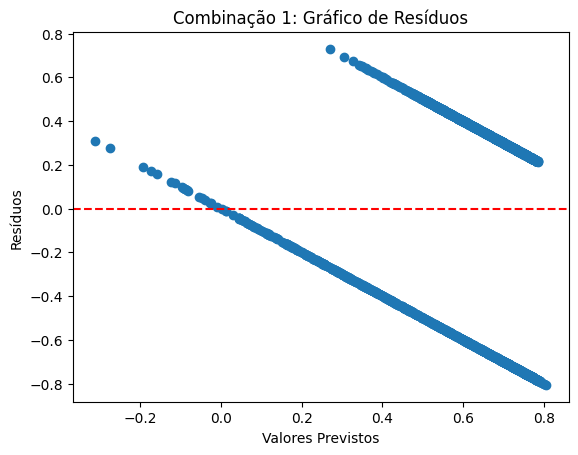

In [44]:
# Gráfico de resíduos da combinação 1
residuals1 = y1_test - y1_pred
plt.scatter(y1_pred, residuals1)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Combinação 1: Gráfico de Resíduos')
plt.show()

# **Gráfico de dispersão da combinação 2**

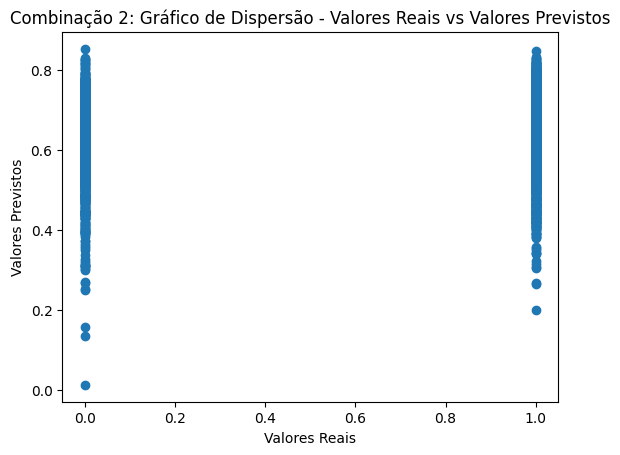

In [45]:
plt.scatter(y2_test, y2_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Combinação 2: Gráfico de Dispersão - Valores Reais vs Valores Previstos')
plt.show()


# **Gráfico de resíduos da combinação 2**



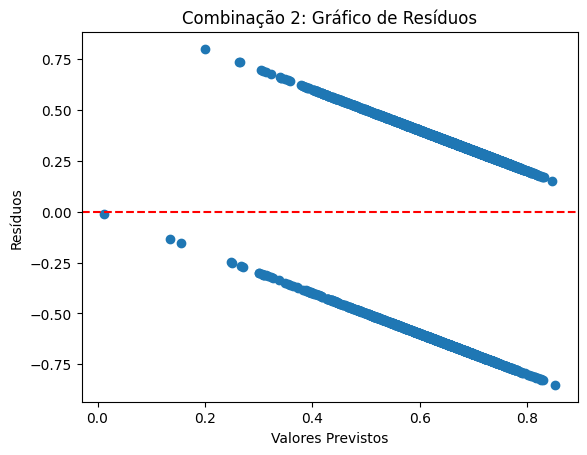

In [46]:
residuals2 = y2_test - y2_pred
plt.scatter(y2_pred, residuals2)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Combinação 2: Gráfico de Resíduos')
plt.show()

# **Gráfico de dispersão da combinação 3**



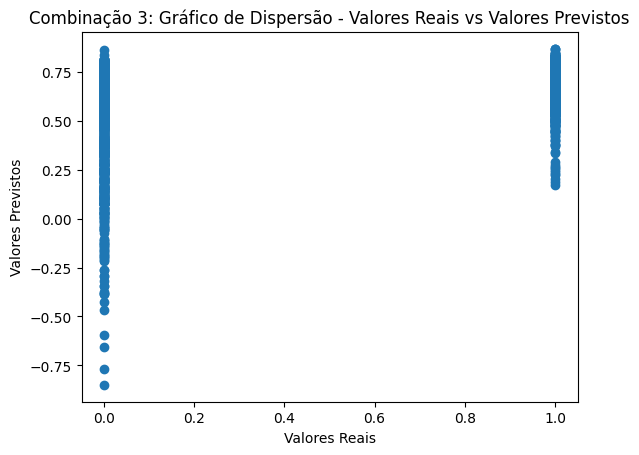

In [48]:
plt.scatter(y3_test, y3_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Combinação 3: Gráfico de Dispersão - Valores Reais vs Valores Previstos')
plt.show()


# **Gráfico de resíduos da combinação 3**

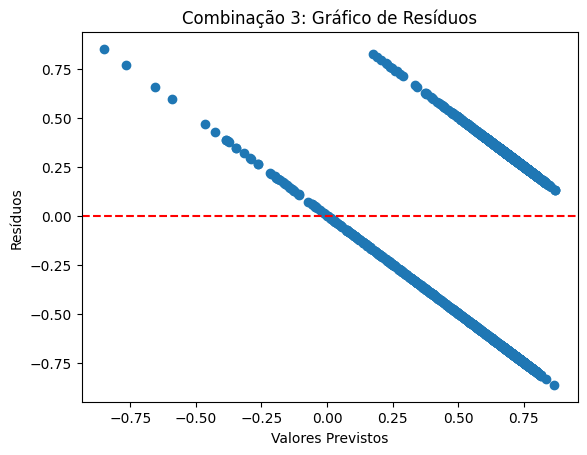

In [47]:
residuals3 = y3_test - y3_pred
plt.scatter(y3_pred, residuals3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Combinação 3: Gráfico de Resíduos')
plt.show()

# **7 - Resposta : ✅**

**A combinação 3 apresentou o menor erro médio quadrado (MSE) de 0.1984, indicando um ajuste melhor do modelo de regressão aos dados em comparação com as outras combinações (Combinação 1: MSE = 0.2047 e Combinação 2: MSE = 0.2205). Portanto, a combinação 3 foi a mais eficiente em termos de previsões mais precisas.**

# **⏺ 8 - "Qual é o tamanho do conjunto de treinamento, validação e teste, em termos de número de amostras, e quantas características cada amostra possui?**

In [53]:
treino, validacao, teste = np.split(dados.sample(frac=1), [int(0.6*len(dados)), int(0.8*len(dados))])

def escalar_conjunto_dados(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

treino, X_treino, y_treino = escalar_conjunto_dados(treino, oversample=True)
validacao, X_validacao, y_validacao = escalar_conjunto_dados(validacao, oversample=False)
teste, X_teste, y_teste = escalar_conjunto_dados(teste, oversample=False)

print("Conjunto de Treinamento:")
print("X_treino shape:", X_treino.shape)
print("y_treino shape:", y_treino.shape)

print("\nConjunto de Validação:")
print("X_validacao shape:", X_validacao.shape)
print("y_validacao shape:", y_validacao.shape)

print("\nConjunto de Teste:")
print("X_teste shape:", X_teste.shape)
print("y_teste shape:", y_teste.shape)


Conjunto de Treinamento:
X_treino shape: (14710, 10)
y_treino shape: (14710,)

Conjunto de Validação:
X_validacao shape: (3804, 10)
y_validacao shape: (3804,)

Conjunto de Teste:
X_teste shape: (3804, 10)
y_teste shape: (3804,)


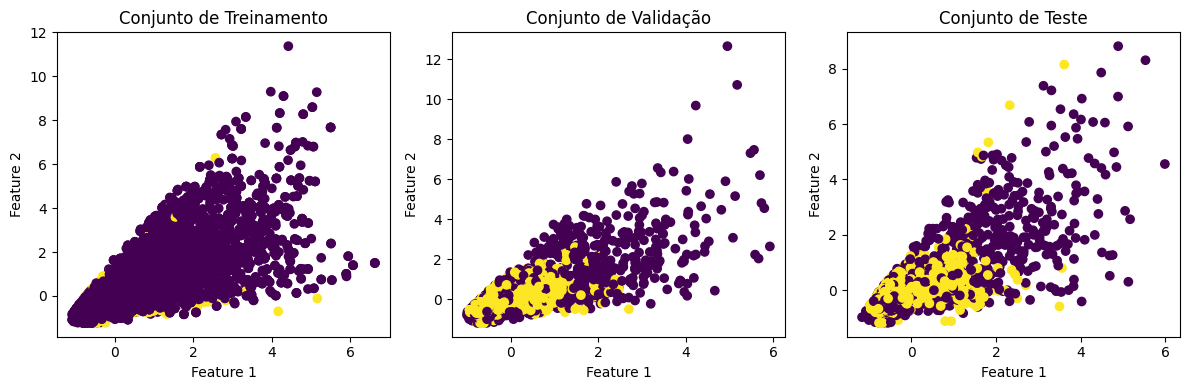

In [54]:
import matplotlib.pyplot as plt

# Visualização dos conjuntos de treinamento, validação e teste
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Conjunto de Treinamento
axes[0].set_title("Conjunto de Treinamento")
axes[0].scatter(X_treino[:, 0], X_treino[:, 1], c=y_treino)
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

# Conjunto de Validação
axes[1].set_title("Conjunto de Validação")
axes[1].scatter(X_validacao[:, 0], X_validacao[:, 1], c=y_validacao)
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")

# Conjunto de Teste
axes[2].set_title("Conjunto de Teste")
axes[2].scatter(X_teste[:, 0], X_teste[:, 1], c=y_teste)
axes[2].set_xlabel("Feature 1")
axes[2].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()


# **8 - Resposta : ✅**

**Conjunto de Treinamento: Possui 14.710 amostras com 10 características cada.
Conjunto de Validação: Contém 3.804 amostras com 10 características cada.
Conjunto de Teste: Composto por 3.804 amostras com 10 características cada.
Essas informações indicam a quantidade de dados em cada conjunto (treinamento, validação e teste) e a quantidade de características presentes em cada amostra.**



# **⏺ 9 - Qual é a precisão, recall e F1-score para cada classe do modelo KNN na classificação realizada?**

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))
report = classification_report(y_test, y_pred, output_dict=True)



              precision    recall  f1-score   support

           0       0.84      0.61      0.70      1344
           1       0.81      0.93      0.87      2460

    accuracy                           0.82      3804
   macro avg       0.82      0.77      0.79      3804
weighted avg       0.82      0.82      0.81      3804



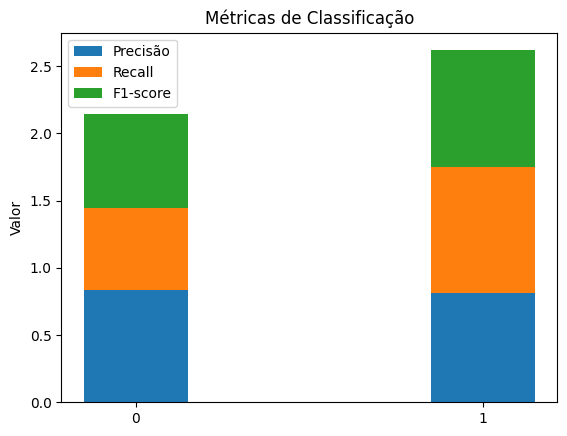

In [63]:
# Extrair as métricas de precisão, recall e f1-score
labels = list(report.keys())[:-3]
precision = [report[label]['precision'] for label in labels]
recall = [report[label]['recall'] for label in labels]
f1_score = [report[label]['f1-score'] for label in labels]

# Plotar o gráfico de barras
x = range(len(labels))
width = 0.3

fig, ax = plt.subplots()
ax.bar(x, precision, width, label='Precisão')
ax.bar(x, recall, width, label='Recall', bottom=precision)
ax.bar(x, f1_score, width, label='F1-score', bottom=[p+r for p, r in zip(precision, recall)])

ax.set_ylabel('Valor')
ax.set_title('Métricas de Classificação')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

# **9 - Resposta: ✅**


**A precisão para a classe 0 é de 84%, o recall é de 61% e o F1-score é de 70%. Já para a classe 1, a precisão é de 81%, o recall é de 93% e o F1-score é de 87%.**

# **⏺ 10 - Qual é o desempenho do modelo de classificação Naive Bayes, medido por meio das métricas de precisão, recall e F1-score?**

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

modelo_nb = GaussianNB()
modelo_nb.fit(X_treino, y_treino)

y_pred = modelo_nb.predict(X_teste)
print(classification_report(y_teste, y_pred))

report = classification_report(y_teste, y_pred, output_dict=True)

              precision    recall  f1-score   support

           0       0.66      0.39      0.49      1310
           1       0.74      0.89      0.81      2494

    accuracy                           0.72      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.71      0.72      0.70      3804



In [68]:
# Extrair as métricas de precisão, recall e F1-score
labels = list(report.keys())[:-3]
precisao = [report[label]['precision'] for label in labels]
revocacao = [report[label]['recall'] for label in labels]
f1_score = [report[label]['f1-score'] for label in labels]




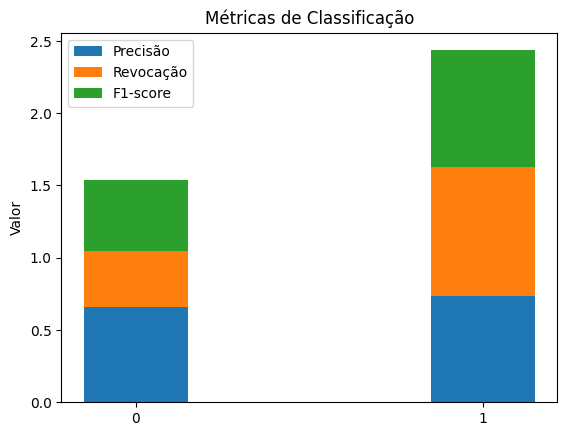

In [69]:
# Plotar o gráfico de barras
x = range(len(labels))
largura = 0.3

fig, ax = plt.subplots()
ax.bar(x, precisao, largura, label='Precisão')
ax.bar(x, revocacao, largura, label='Revocação', bottom=precisao)
ax.bar(x, f1_score, largura, label='F1-score', bottom=[p+r for p, r in zip(precisao, revocacao)])

ax.set_ylabel('Valor')
ax.set_title('Métricas de Classificação')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

# **10 - Resposta: ✅**


**A precisão, recall e F1-score para cada classe no modelo de classificação Naive Bayes aplicado são:**

**Classe 0: Precisão 0.66, Recall 0.39, F1-score 0.49.
Classe 1: Precisão 0.74, Recall 0.89, F1-score 0.81.**